# PART A

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Data Understanding and Exploration

In [91]:
df1 = pd.read_csv('TelcomCustomer-Churn_1.csv')

In [92]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [93]:
df2 = pd.read_csv('TelcomCustomer-Churn_2.csv')

In [94]:
df2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Merge the data

In [57]:
df = pd.merge(df1, df2, on='customerID')

In [58]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Verify if all columns are present in the merged dataframe

In [59]:
if df1.columns.all() and df2.columns.all():
    print("All columns are incorporated in the merged DataFrame")
else:
    print("Columns are missing in the merged DataFrame")

All columns are incorporated in the merged DataFrame


### Data Cleaning and Analysis

### Impute missing or unexpected values¶

In [60]:
df = df.replace(' ', np.nan)
df = df.dropna()

In [61]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Convert variables with continuous values to 'float' type

In [62]:
df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


### plot pie-charts for categorical variables

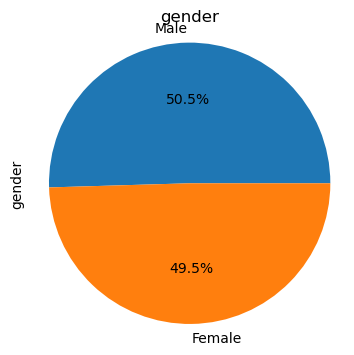

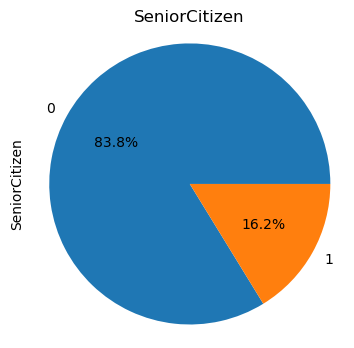

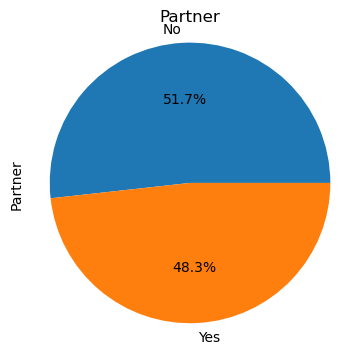

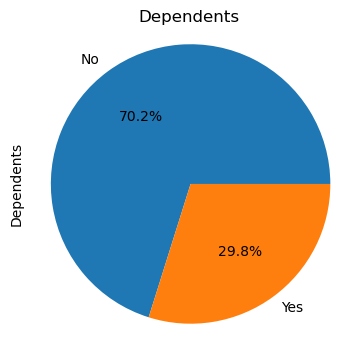

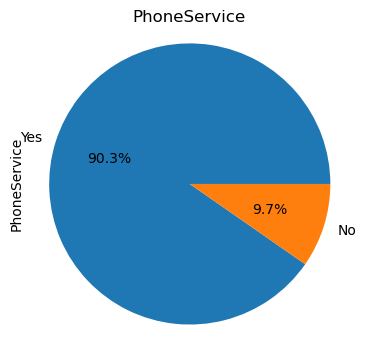

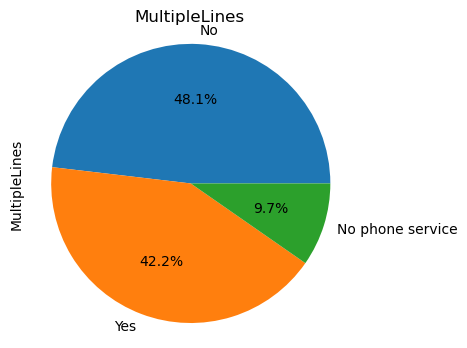

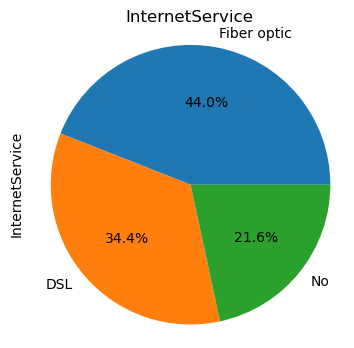

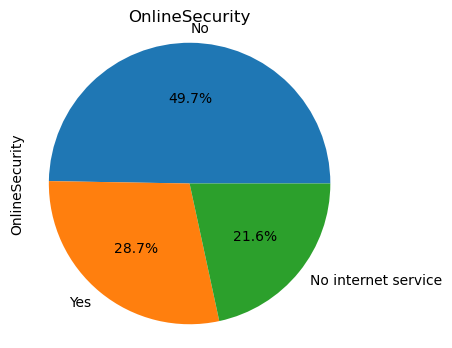

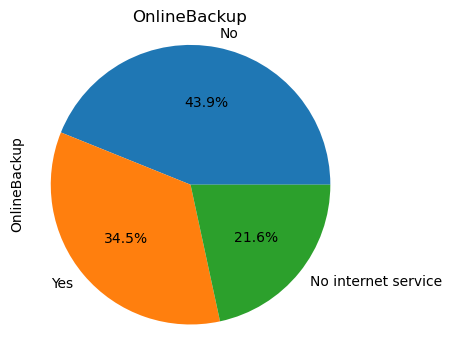

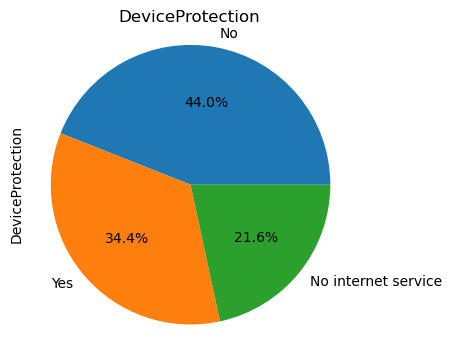

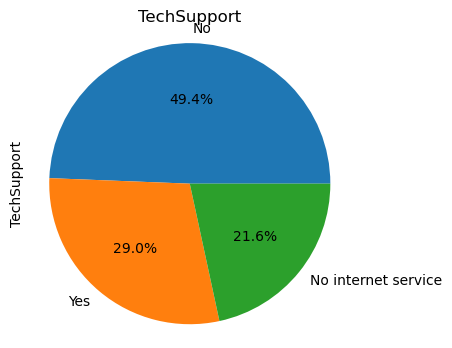

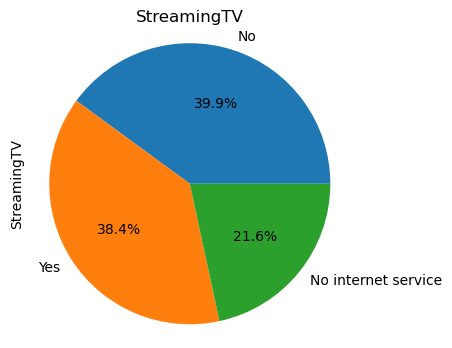

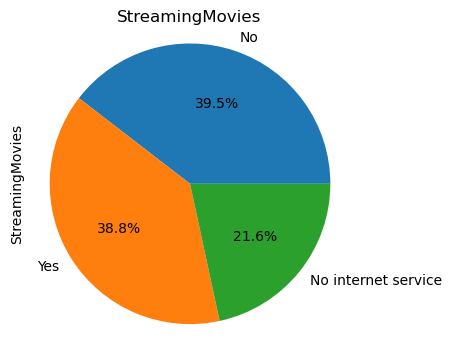

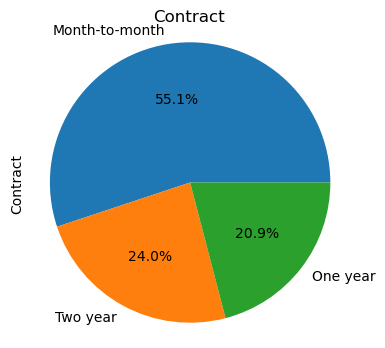

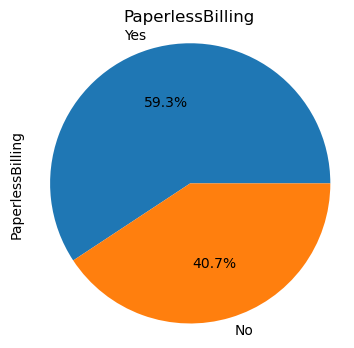

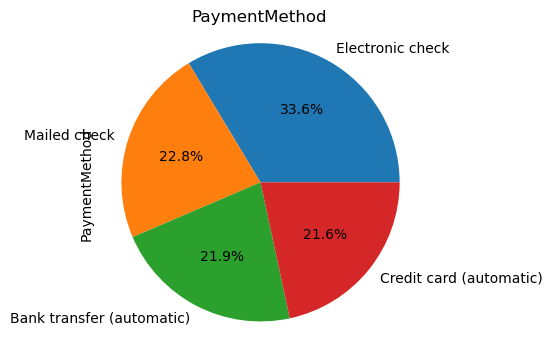

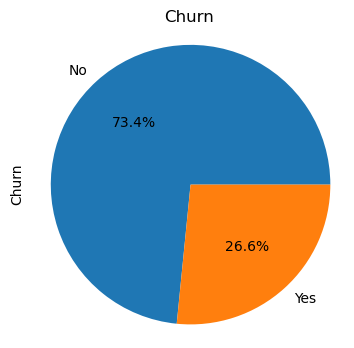

In [64]:
def plot_pie_charts(dataframe):
    cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
    for col in cols:
        plt.figure(figsize=(4,4))
        dataframe[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.title(col)
        plt.axis('equal')
        plt.show()
        
plot_pie_charts(df)

### INSIGHTS ON PIE CHART
1. The gender distribution is almost equal
2. The gender distribution is almost equal.
3. The majority of customers have internet service.
4. Most customers opt for a month-to-month contract.
5. Electronic check is the most common payment method.
6. Most customers do not use online backup, device protection, or tech support.
7. Streaming TV and movies are the most common additional services.
8. There are roughly equal numbers of male and female customers.
9. The majority of customers do not have dependents.

### Encoding all the appropriate Categorical features

In [65]:
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for column in cat_cols:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [66]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


### Split the data into train and test sets

In [67]:
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Normalize/Standardize the data using StandardScaler

In [69]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model building and Improvement

In [70]:
xgb_clf = xgb.XGBClassifier(objective='binary:logistic')

In [71]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [72]:
y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

In [73]:
print("Train Accuracy : ", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix : \n", confusion_matrix(y_train, y_train_pred))
print("Classification Report : \n", classification_report(y_train, y_train_pred))

Train Accuracy :  0.9452444444444444
Confusion Matrix : 
 [[4007  123]
 [ 185 1310]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      4130
           1       0.91      0.88      0.89      1495

    accuracy                           0.95      5625
   macro avg       0.94      0.92      0.93      5625
weighted avg       0.94      0.95      0.94      5625



In [74]:
print("Test Accuracy : ", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix : \n", confusion_matrix(y_test, y_test_pred))
print("Classification Report : \n", classification_report(y_test, y_test_pred))

Test Accuracy :  0.7697228144989339
Confusion Matrix : 
 [[902 131]
 [193 181]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.87      0.85      1033
           1       0.58      0.48      0.53       374

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



### Improving performance of the XGBoost

In [75]:
parameters = {'max_depth': [3, 4, 5], 'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 200, 300]}

In [76]:
xgb_grid = GridSearchCV(xgb_clf, parameters, scoring='accuracy', n_jobs=-1, cv=5)
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [77]:
print("Best parameters : ", xgb_grid.best_params_)
print("Best Score : ", xgb_grid.best_score_)

Best parameters :  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Score :  0.8069333333333333


In [78]:
y_train_pred = xgb_grid.best_estimator_.predict(X_train)
y_test_pred = xgb_grid.best_estimator_.predict(X_test)

In [79]:
print("Train Accuracy : ", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix : \n", confusion_matrix(y_train, y_train_pred))
print("Classification Report : \n", classification_report(y_train, y_train_pred))

Train Accuracy :  0.8232888888888888
Confusion Matrix : 
 [[3788  342]
 [ 652  843]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      4130
           1       0.71      0.56      0.63      1495

    accuracy                           0.82      5625
   macro avg       0.78      0.74      0.76      5625
weighted avg       0.82      0.82      0.82      5625



In [80]:
print("Test Accuracy : ", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix : \n", confusion_matrix(y_test, y_test_pred))
print("Classification Report : \n", classification_report(y_test, y_test_pred))

Test Accuracy :  0.7938877043354655
Confusion Matrix : 
 [[937  96]
 [194 180]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.65      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [86]:
grid_search = GridSearchCV(xgb_clf, param_grid=parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [88]:
print("Best parameters: ", grid_search.best_params_)
print("Train accuracy: ", grid_search.best_score_)
print("Test accuracy: ", xgb_clf.score(X_test, y_test))

Best parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Train accuracy:  0.8069333333333333
Test accuracy:  0.7697228144989339


# PART B

In [283]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [284]:
class MLWorkflow:
    def __init__(self, dataset_path):
        self.dataset_path = "/OneDrive/TelcomCustomer-Churn_2.csv"
        self.dataset = None
        self.preprocessed_data = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.models = {'Logistic Regression': {'Accuracy': None, 'F1 Score': None, 'Model': LogisticRegression()},
                       'Decision Tree': {'Accuracy': None, 'F1 Score': None, 'Model': DecisionTreeClassifier()},
                       'Random Forest': {'Accuracy': None, 'F1 Score': None, 'Model': RandomForestClassifier()}}

In [285]:
def load_dataset(self):
        
        try:
            self.dataset = pd.read_csv("/OneDrive/TelcomCustomer-Churn_2.csv")
        except FileNotFoundError:
            print('Error: Dataset file not found.')

In [286]:
 def preprocess_data(self):
        
        try:
            
            self.dataset.drop(['customerID'], axis=1, inplace=True)

            
            self.dataset['TotalCharges'] = self.dataset['TotalCharges'].replace(' ', np.nan)
            self.dataset['TotalCharges'] = pd.to_numeric(self.dataset['TotalCharges'], errors='coerce')
            self.dataset['TotalCharges'].fillna(self.dataset['TotalCharges'].median(), inplace=True)

            
            self.dataset['Churn'].replace(to_replace='Yes', value=1, inplace=True)
            self.dataset['Churn'].replace(to_replace='No', value=0, inplace=True)
            self.dataset['SeniorCitizen'].replace(to_replace=1, value='Yes', inplace=True)
        except AttributeError:
            print('Error: Dataset not found. Please load the dataset first.')
        except KeyError:
            print('Error: The dataset does not have the required columns.')

In [287]:
def split_data(self):
    
    try:
        X = self.preprocessed_data.iloc[:, :-1]
        y = self.preprocessed_data.iloc[:, -1]

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    except AttributeError:
        print('Error: Preprocessed data not found. Please preprocess the data first.')

In [288]:
def train_models(self):
       
        try:
            for model_name, model_data in self.models.items():
                model = model_data['Model']
                model.fit(self.X_train, self.y_train)

                y_pred = model.predict(self.X_test)

                accuracy = accuracy_score(self.y_test, y_pred)
                f1 = f1_score(self.y_test, y_pred)

                self.models[model_name]['Accuracy'] = accuracy
                self.models[model_name]['F1 Score'] = f1
                self.models[model_name]['Model'] = model

            best_model = max(self.models, key=lambda x: self.models[x]['F1 Score'])
            print('Best Performing Model: ', best_model)
        except AttributeError:
            print('Error: Preprocessed data not found. Please preprocess the data first.')

In [289]:
def save_models(self):
    
    try:
        for model_name, model_data in self.models.items():
            with open(model_name + '.pickle', 'wb') as f:
                pickle.dump(model_data['Model'], f)
    except TypeError:
        print('Error: Cannot serialize model object.')
    except FileNotFoundError:
        print('Error: File not found.')


In [302]:
def run(self):
        self.load_data()
        self.preprocess_data()
        self.train_model()
        self.evaluate_model()
        self.workflow()

In [303]:
def load_models(self):
    
    try:
        for model_name, model_data in self.models.items():
            with open(model_name + '.pickle', 'rb') as f:
                self.models[model_name]['Model'] = pickle.load(f)
    except TypeError:
        print('Error: Cannot deserialize model object.')
    except FileNotFoundError:
        print('Error: File not found.')

In [308]:
if __name__ == '__main__':
    
    workflow = MLWorkflow('TelcomCustomer-Churn_2.csv')

In [309]:
workflow